## Group : 14
* Names: 
* 1. Soha Ashraf     205001
* 2. Mariam Saeed    203891


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Pd max row to 500
pd.set_option('display.max_row', 500)
# pd min col. to 50
pd.set_option('display.max_columns', 50)

import requests
import re
from bs4 import BeautifulSoup 
import math


## DataSets:
* 1.	Crimes - 2001 to present (Chicago) (Press "Export").
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2 [Accessed in 2.3.2022].

* 2.	Census Data - Selected socioeconomic indicators in Chicago, 2008 – 2012. 
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2 [Accessed in 9.3.2022].

* 3.	Crime in the United States (USA).
https://www.fbi.gov/about-us/cjis/ucr/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/1tabledatadecoverviewpdf/table_1_crime_in_the_united_states_by_volume_and_rate_per_100000_inhabitants_1994-2013.xls[Accessed in 9.3.2022].

* 4.	Public School in Chicago.
https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t[Accessed in 9.3.2022].


## PART 2: DATA CLEAN:

In [2]:
##Read Dataset 
crime = pd.read_csv('Crimes_-_2001_to_Present.csv')

In [3]:
crime.shape

(1048575, 22)

In [4]:
###Show Null values
crime.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3122
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                    26302
Community Area          26190
FBI Code                    0
X Coordinate             5130
Y Coordinate             5130
Year                        0
Updated On                  0
Latitude                 5130
Longitude                5130
Location                 5130
dtype: int64

In [5]:
##Drop column "Location" because it of the duplicated values as it have the "Latitude" and "Longitude"
## And it is not nesscary and it have alot of missing values.
crime.drop(['Location'],axis=1,inplace=True)
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121


In [6]:
##Fill the Null or missing values(0 for numerical variables, NULL for string variables)
crime['Community Area'] = crime['Community Area'].fillna(0) 
crime['District'] = crime['District'].fillna(0) 
crime['Ward'] = crime['Ward'].fillna(0) 
crime['X Coordinate'] = crime['X Coordinate'].fillna(0) 
crime['Y Coordinate'] = crime['Y Coordinate'].fillna(0) 
crime['Latitude'] = crime['Latitude'].fillna(0)
crime['Longitude'] = crime['Longitude'].fillna(0)
crime['Location Description'] = crime['Location Description'].fillna('No Location Description')
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
dtype: int64

In [7]:
##To make sure it works
row = crime.iloc[9]
print(row)

ID                                                 11645836
Case Number                                        JC212333
Date                                          5/1/2016 0:25
Block                                   055XX S ROCKWELL ST
IUCR                                                   1153
Primary Type                             DECEPTIVE PRACTICE
Description             FINANCIAL IDENTITY THEFT OVER $ 300
Location Description                No Location Description
Arrest                                                False
Domestic                                              False
Beat                                                    824
District                                                8.0
Ward                                                   15.0
Community Area                                         63.0
FBI Code                                                 11
X Coordinate                                            0.0
Y Coordinate                            

In [8]:
crime.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
dtype: object

In [9]:
##We changed the data types because Community Area, District, Ward are inteager values, so it's not nessceary to be float.
##And we use datetime data type because it is date
##And we use catagory because it is fixed value.
crime['Community Area'] = crime['Community Area'].astype('int64')
crime['District'] = crime['District'].astype('int64')
crime['Ward'] = crime['Ward'].astype('int64')
crime['Beat'] = crime['Beat'].astype('int64')
crime["Date"] = pd.to_datetime(crime["Date"], format = "%m/%d/%Y %H:%M", utc = True)
crime["Updated On"] = pd.to_datetime(crime["Updated On"], format = "%m/%d/%Y %H:%M", utc = True)
crime["Primary Type"] = crime["Primary Type"].astype("category")

crime.dtypes

ID                                    int64
Case Number                          object
Date                    datetime64[ns, UTC]
Block                                object
IUCR                                 object
Primary Type                       category
Description                          object
Location Description                 object
Arrest                                 bool
Domestic                               bool
Beat                                  int64
District                              int64
Ward                                  int64
Community Area                        int64
FBI Code                             object
X Coordinate                        float64
Y Coordinate                        float64
Year                                  int64
Updated On              datetime64[ns, UTC]
Latitude                            float64
Longitude                           float64
dtype: object

In [10]:
##To check the duplicated values
crime.duplicated().sum()

0

## 2. Data Encoding:


In [11]:
##range using cut() (1->10,10->20, 20->30, 30->40, 40->50, 50->60, 60-> 70, 70->77)
#bin = [1,10,20,30,40,50,60,70,77]
#crime['Community Area']= pd.cut(crime['Community Area'], bin)
##To make sure it works.
#crime.loc[:7, ["Community Area"]]

In [12]:
##We split the date and time to be easy to get the time values.
crime['Dates'] = pd.to_datetime(crime['Date']).dt.date
crime['Time'] = pd.to_datetime(crime['Date']).dt.time
crime['Updated Dates'] = pd.to_datetime(crime['Updated On']).dt.date
crime['Updated Time'] = pd.to_datetime(crime['Updated On']).dt.time
##Drop the Date column as it is a duplicated now after split the date into time and date columns.
crime.drop(['Date'],axis=1,inplace=True)
crime.drop(['Updated On'],axis=1,inplace=True)

In [13]:
##To make sure it works.
crime.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Dates,Time,Updated Dates,Updated Time
0,10224738,HY411648,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,2015-09-05,13:30:00,2018-02-10,15:50:00
1,10224739,HY411615,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,6,1138875.0,1904869.0,2015,41.895080,-87.765400,2015-09-04,11:30:00,2018-02-10,15:50:00
2,11646166,JC213529,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,6,0.0,0.0,2018,0.000000,0.000000,2018-09-01,00:01:00,2019-04-06,16:04:00
3,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,41.937406,-87.716650,2015-09-05,12:45:00,2018-02-10,15:50:00
4,10224741,HY411610,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,2015-09-05,13:00:00,2018-02-10,15:50:00


In [14]:
crime =pd.get_dummies(crime, columns=['Domestic'])
##To make sure it works
crime.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Dates,Time,Updated Dates,Updated Time,Domestic_False,Domestic_True
0,10224738,HY411648,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,924,9,12,61,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,2015-09-05,13:30:00,2018-02-10,15:50:00,0,1
1,10224739,HY411615,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,1511,15,29,25,6,1138875.0,1904869.0,2015,41.895080,-87.765400,2015-09-04,11:30:00,2018-02-10,15:50:00,1,0
2,11646166,JC213529,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,631,6,8,44,6,0.0,0.0,2018,0.000000,0.000000,2018-09-01,00:01:00,2019-04-06,16:04:00,0,1
3,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,1412,14,35,21,18,1152037.0,1920384.0,2015,41.937406,-87.716650,2015-09-05,12:45:00,2018-02-10,15:50:00,1,0
4,10224741,HY411610,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,1522,15,28,25,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,2015-09-05,13:00:00,2018-02-10,15:50:00,0,1


In [15]:
crime["Time"] = pd.to_datetime(crime["Time"], format = "%H:%M:%S", utc = True)
crime["Dates"] = pd.to_datetime(crime["Dates"], format = "%Y/%m/%d", utc = True)
crime["Updated Time"] = pd.to_datetime(crime["Updated Time"], format = "%H:%M:%S", utc = True)
crime["Updated Dates"] = pd.to_datetime(crime["Updated Dates"], format = "%Y/%m/%d", utc = True)
crime.dtypes

ID                                    int64
Case Number                          object
Block                                object
IUCR                                 object
Primary Type                       category
Description                          object
Location Description                 object
Arrest                                 bool
Beat                                  int64
District                              int64
Ward                                  int64
Community Area                        int64
FBI Code                             object
X Coordinate                        float64
Y Coordinate                        float64
Year                                  int64
Latitude                            float64
Longitude                           float64
Dates                   datetime64[ns, UTC]
Time                    datetime64[ns, UTC]
Updated Dates           datetime64[ns, UTC]
Updated Time            datetime64[ns, UTC]
Domestic_False                  

In [16]:
## aggregation
crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Domestic_False,Domestic_True
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.071725e+07,1.145122e+03,1.120280e+01,2.260326e+01,3.586027e+01,1.159104e+06,1.877172e+06,2.016530e+03,4.163916e+01,-8.724182e+01,8.375929e-01,1.624071e-01
std,1.580197e+06,6.956309e+02,6.945246e+00,1.429876e+01,2.188544e+01,8.287616e+04,1.352668e+05,2.786623e+00,2.920878e+00,6.117431e+00,3.688240e-01,3.688240e-01
min,1.007000e+03,1.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,0.000000e+00,-9.168657e+01,0.000000e+00,0.000000e+00
25%,1.054158e+07,6.120000e+02,6.000000e+00,9.000000e+00,2.200000e+01,1.152915e+06,1.858988e+06,2.016000e+03,4.176848e+01,-8.771297e+01,1.000000e+00,0.000000e+00
50%,1.096403e+07,1.031000e+03,1.000000e+01,2.300000e+01,3.100000e+01,1.166468e+06,1.893359e+06,2.017000e+03,4.186298e+01,-8.766403e+01,1.000000e+00,0.000000e+00
75%,1.133600e+07,1.713000e+03,1.700000e+01,3.400000e+01,5.300000e+01,1.176417e+06,1.908711e+06,2.018000e+03,4.190528e+01,-8.762773e+01,1.000000e+00,0.000000e+00
max,1.224939e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.020000e+03,4.202267e+01,0.000000e+00,1.000000e+00,1.000000e+00


## PART 3 : Data Visualization and Interpretation (Question Answering) 

In [17]:
#Q1) Are the number of the crimes increases at late time (from 00:00:00 to 05:00:00) through years?

## Q2) What is the ratio of crime arrest based on crime types?

In [18]:
arrest_primarytype = crime.groupby('Primary Type')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_primarytype['Percentage'] = (100 * arrest_primarytype / arrest_primarytype.groupby(level=0).sum())
arrest_primarytype.reset_index(level=[1],inplace=True)
arrest_primarytype

,Arrest,Counts,Percentage
Primary Type,,,
ARSON,False,1518,89.716312
ARSON,True,174,10.283688
ASSAULT,False,61087,81.505844
ASSAULT,True,13861,18.494156
BATTERY,False,154419,78.988317
BATTERY,True,41077,21.011683
BURGLARY,False,48645,95.078475
BURGLARY,True,2518,4.921525
CONCEALED CARRY LICENSE VIOLATION,True,331,96.220930


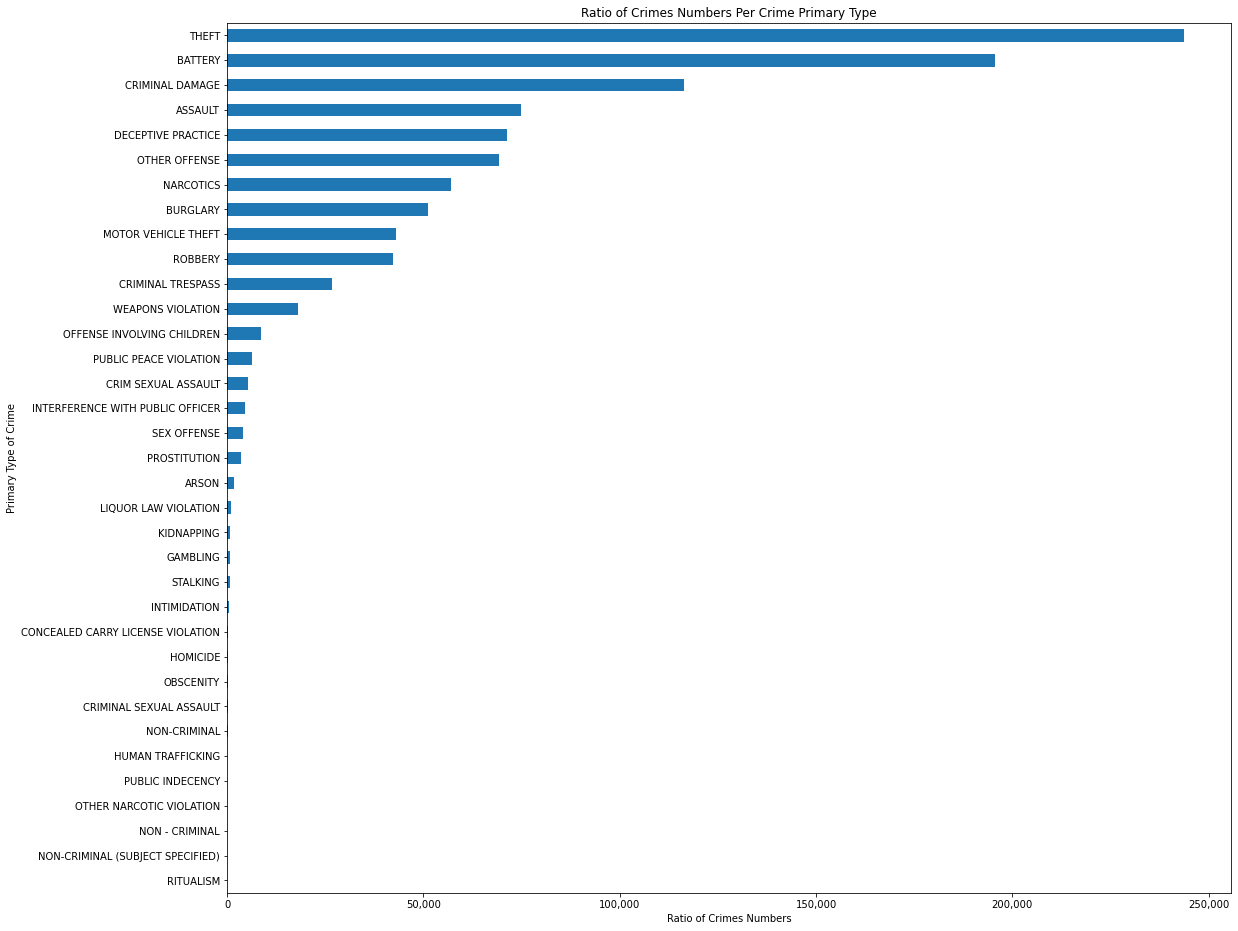

In [19]:
#Q2) What is the ratio of crime based on crime types?
## We wanted to make it with pie chart, but it did not work.
crime_primary_type = crime['Primary Type'].value_counts(ascending=True)
fig=plt.figure(figsize=(18, 16))
plt.title("Ratio of Crimes Numbers Per Crime Primary Type")
plt.xlabel("Ratio of Crimes Numbers")
plt.ylabel("Primary Type of Crime")
ax = crime_primary_type.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## Q3) What is the period between the date of the crime and the date it was updated?

In [20]:
def days_between(d1, d2):
    d1 = crime
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [21]:
crime['Dates'] = (crime['Dates'])
crime['Updated Dates'] = (crime['Updated Dates']) 
crime['Date Period'] = crime['Updated Dates'] - crime['Dates'] 
crime.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Dates,Time,Updated Dates,Updated Time,Domestic_False,Domestic_True,Date Period
0,10224738,HY411648,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,924,9,12,61,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,2015-09-05 00:00:00+00:00,1900-01-01 13:30:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,0,1,889 days
1,10224739,HY411615,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,1511,15,29,25,6,1138875.0,1904869.0,2015,41.895080,-87.765400,2015-09-04 00:00:00+00:00,1900-01-01 11:30:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,1,0,890 days
2,11646166,JC213529,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,631,6,8,44,6,0.0,0.0,2018,0.000000,0.000000,2018-09-01 00:00:00+00:00,1900-01-01 00:01:00+00:00,2019-04-06 00:00:00+00:00,1900-01-01 16:04:00+00:00,0,1,217 days
3,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,1412,14,35,21,18,1152037.0,1920384.0,2015,41.937406,-87.716650,2015-09-05 00:00:00+00:00,1900-01-01 12:45:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,1,0,889 days
4,10224741,HY411610,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,1522,15,28,25,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,2015-09-05 00:00:00+00:00,1900-01-01 13:00:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,0,1,889 days


## Q4) During the summer months, what the higher rate of crimes happened this time? 

In [22]:
dates = crime['Dates']  
frame = pd.to_datetime(dates, dayfirst = True)
frame = pd.DataFrame([frame]).transpose()
frame['Dates']= frame
frame['month']= frame['Dates'].dt.month
month = frame['month']
  
frame

,Dates,month
0,2015-09-05 00:00:00+00:00,9
1,2015-09-04 00:00:00+00:00,9
2,2018-09-01 00:00:00+00:00,9
3,2015-09-05 00:00:00+00:00,9
4,2015-09-05 00:00:00+00:00,9
...,...,...
1048570,2001-01-04 00:00:00+00:00,1
1048571,2001-01-02 00:00:00+00:00,1
1048572,2001-01-04 00:00:00+00:00,1
1048573,2001-01-05 00:00:00+00:00,1


In [23]:
## Month splited from the date to get the month easily.
crime['month'] = pd.to_datetime(crime['Dates']).dt.month
month_crime = crime.groupby(['month'])['month'].count()/len(crime)*100
print(month_crime)

month
1     9.838495
2     7.165534
3     8.402260
4     8.193024
5     8.245476
6     7.075507
7     8.255490
8     9.443864
9     8.533867
10    9.252843
11    7.758053
12    7.835586
Name: month, dtype: float64


In [24]:
arrested_month = crime.groupby(frame['month'])['Arrest'].value_counts().rename('Arrested Month').to_frame()
arrested_month['Arrested Month Percentage'] = (100 * arrested_month / arrested_month.groupby(level=0).sum())
arrested_month.reset_index(level=[1],inplace=True)
arrested_month.drop_duplicates(keep = False, inplace = True)

Text(0, 0.5, 'Percentage of Crimes')

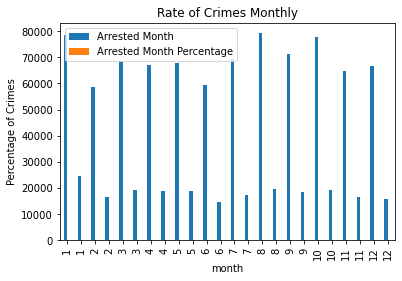

In [25]:
arrested_month.plot(kind='bar',title="Rate of Crimes Monthly")
plt.ylabel('Percentage of Crimes')

In [26]:
#Q4) During the summer months, what the higher rate of crimes happened this time? 

crime_month = crime.groupby('Primary Type')['month'].value_counts().rename('Number').to_frame()
crime_month['Percentage'] = (100 * crime_month / crime_month.groupby(level=0).sum())
crime_month.reset_index(level=[1],inplace=True)
crime_month

,month,Number,Percentage
Primary Type,,,
ARSON,10,174,10.283688
ARSON,8,162,9.574468
ARSON,1,155,9.160757
ARSON,4,145,8.569740
ARSON,5,145,8.569740
ARSON,7,141,8.333333
ARSON,9,139,8.215130
ARSON,11,134,7.919622
ARSON,3,133,7.860520


In [27]:
##Difficulties:

##Question 4: we try to solve it but an error occurs because when we do the range the datatype changed to category.
##1. We wanted to make “Primary type” dummy variable, we change its data type to category, but it was huge 
##as we could not see the rest of the columns in the dataset, and we did the same with “Location Description”.

##2. we could not make the difference between time visualization as the plot / chart would be just dates.
##3. In Q4, we tried to make no duplicated, but we could not, and we also wanted to select or make range for the months
## but it did not work.
## 4. In Q1, we could not get the range of the time.
## 5. Making the visualization was very confusing for us as we want some values (make conditions) and did not work.
## 6. we tried to take small rows and cols for the dataset, but we could not.
## 7. we made time and dates in Date and Updated On cols and it worked, but it did not work here.

In [28]:
## Questions(Goal):
##
##Q1) Are the number of the crimes increases at late time (from 00:00:00 to 05:00:00) through years?
##Q2) What is the ratio of crime based on crime types?
##Q3) What is the period between the date of the crime and the date it was updated?
##Q4) During the summer months, what the higher rate of crimes happened this time? 
##NOTE: There are some researchers about it, as the people in the summer leave their homes because of the increase of the temperature, so there a lot of crimes happen this time.
##Q5) How did the crimes effect on safety score in the community area? And what are the safety icon? 
##Q6) What is the location in every community area that a crime happened in it? 



In [29]:
crime[['Dates','Updated Dates']].head()

,Dates,Updated Dates
0,2015-09-05 00:00:00+00:00,2018-02-10 00:00:00+00:00
1,2015-09-04 00:00:00+00:00,2018-02-10 00:00:00+00:00
2,2018-09-01 00:00:00+00:00,2019-04-06 00:00:00+00:00
3,2015-09-05 00:00:00+00:00,2018-02-10 00:00:00+00:00
4,2015-09-05 00:00:00+00:00,2018-02-10 00:00:00+00:00


## Data Scraping: Using FBI Dataset

In [30]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
url='https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/1tabledatadecoverviewpdf/table_1_crime_in_the_united_states_by_volume_and_rate_per_100000_inhabitants_1994-2013.xls'
crimes_fbi = requests.get(url,headers=headers)


In [31]:
fbi_text = crimes_fbi.text
fbi_page = BeautifulSoup(fbi_text,'html.parser')

In [32]:
fbi_page.prettify()[:1000]

'<html lang="en-us">\n <head>\n  <base href="https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/1tabledatadecoverviewpdf/table_1_crime_in_the_united_states_by_volume_and_rate_per_100000_inhabitants_1994-2013.xls"/>\n  <title>\n   FBI — Table 1\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="ie=edge" http-equiv="x-ua-compatible"/>\n  <link href="/css/bbb/plone-base.css?v=174" rel="stylesheet"/>\n  <link href="/css/plone.css?v=171" rel="stylesheet"/>\n  <link href="/css/index.css?v=175" rel="stylesheet"/>\n  <link href="/css/bbb/ucr-styles.css?v=178" rel="stylesheet"/>\n  <link href="/css/bbb/bbb.css?v=174" rel="stylesheet"/>\n  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="Plone - http://plone.org" name="generator"/>\n  <meta content="IE=11; IE=10; IE=9; IE=8" http-equiv="X-UA-Compatible"/>\n  <meta content="2014/11/03" name="modificationDate"/>\n  <meta content="2014/10/23" name="creationDate"/>\n  <meta content="201

In [33]:
len(fbi_page.find('table'))

5

In [34]:
len(fbi_page.find_all("table"))

1

In [35]:
## Get the table class name in the html code
class_='data'
table = fbi_page.find('table',attrs={'class':class_})
table

<table border="0" cellpadding="0" cellspacing="0" class="data" summary="Efforts have been made to make this data table accessible for screen readers; however, if your reader has difficulty with this table, the Excel spreadsheet version is available. Access Key D will take you to the download area.">
<thead>
<tr>
<th class="even group0 aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell30" rowspan="1" scope="col">
Year</th>
<th class="odd group1 aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell31" rowspan="1" scope="col">
Population<sup>1</sup>
</th>
<th class="even group2 bold aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell32" rowspan="1" scope="col">
<b>Violent<br/>crime</b>
</th>
<th class="odd group3 italic aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell33" rowspan="1" scope="col">
<i>Violent <br/>crime <br/>rate </i>
</th>
<th class="even group4 aligncenter valignmentbottom subthead1" colspan=

In [36]:
table = fbi_page.find("table")
x = table.find_all('th')
for i in x:
    print(i.text)


Year

Population1


Violentcrime


Violent crime rate 


Murder andnonnegligent manslaughter

Murder and nonnegligent manslaughter rate 


Rape(legacydefinition)2


Rape(legacydefinition)2rate


Robbery

Robbery rate 


Aggravated assault

Aggravated assault rate 


Property crime


Property crime rate 


Burglary

Burglary rate 


Larceny-theft

Larceny-theft rate 


Motor vehicle theft

Motor vehicle theft rate 


1994

1995

1996

1997

1998

1999

2000

20013


2002

2003

2004

2005

2006

2007

2008

2009

2010

2011

20124


2013

1 Populations are U.S. Census Bureau provisional estimates as of July 1 for each year except 2000 and 2010, which are decennial census counts.

2 The figures shown in this column for the offense of rape were estimated using the legacy Uniform Crime Reporting definition of rape. See data declaration for further explanation.

3 The murder and nonnegligent homicides that occurred as a result of the events of September 11, 2001, are not included in this t

In [37]:
## Checking the table type to see if it 
## work with Beauitful soup lib. or not 
type(table)

bs4.element.Tag

In [38]:
## To get all names of cols.
table.find_all('th')

[<th class="even group0 aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell30" rowspan="1" scope="col">
 Year</th>,
 <th class="odd group1 aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell31" rowspan="1" scope="col">
 Population<sup>1</sup>
 </th>,
 <th class="even group2 bold aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell32" rowspan="1" scope="col">
 <b>Violent<br/>crime</b>
 </th>,
 <th class="odd group3 italic aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell33" rowspan="1" scope="col">
 <i>Violent <br/>crime <br/>rate </i>
 </th>,
 <th class="even group4 aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell34" rowspan="1" scope="col">
 Murder and<br/>nonnegligent <br/>manslaughter</th>,
 <th class="odd group5 italic aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell35" rowspan="1" scope="col">
 <i>Murder and <br/>nonnegligent <br/>manslaughter <br/>rate </

In [39]:
## Getting the rows and cols in the table as list[].
Year=[]
Population1=[]
Violentcrime=[]
Violent_crime_rate=[]
Murder_andnonnegligent_manslaughter=[]
Murder_and_nonnegligent_manslaughter_rate=[]
Rapelegacydefinition2=[]
Rapelegacydefinition2_rate=[]
Robbery=[]
Robbery_rate=[]
Aggravated_assault=[]
Aggravated_assault_rate=[]
Property_crime=[]
Property_crime_rate =[]
Burglary=[]
Burglar_rate=[]
Larceny_theft=[]
Larceny_theft_rate =[]
Motor_vehicle_theft = []
Motor_vehicle_theft_rate = []


rows = table.find_all('tr')
rows[:3]

[<tr>
 <th class="even group0 aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell30" rowspan="1" scope="col">
 Year</th>
 <th class="odd group1 aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell31" rowspan="1" scope="col">
 Population<sup>1</sup>
 </th>
 <th class="even group2 bold aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell32" rowspan="1" scope="col">
 <b>Violent<br/>crime</b>
 </th>
 <th class="odd group3 italic aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell33" rowspan="1" scope="col">
 <i>Violent <br/>crime <br/>rate </i>
 </th>
 <th class="even group4 aligncenter valignmentbottom subthead1" colspan="1" headers="" id="cell34" rowspan="1" scope="col">
 Murder and<br/>nonnegligent <br/>manslaughter</th>
 <th class="odd group5 italic aligncenter valignmentbottom subthead2" colspan="1" headers="" id="cell35" rowspan="1" scope="col">
 <i>Murder and <br/>nonnegligent <br/>manslaughter <br/>rate <

In [40]:
## To get the table content in html code.
i = 0 
for row in rows:
    if i == 0:
        i += 1
        continue
    cols = row.find_all('td')
    print(cols)
    break

[<td class="odd group1 alignright valignmentbottom numbercell" colspan="1" headers="cell31 cell40" id="cell41" rowspan="1">
260,327,021</td>, <td class="even group2 alignright valignmentbottom numbercell" colspan="1" headers="cell32 cell40" id="cell42" rowspan="1">
1,857,670</td>, <td class="odd group3 indent1 alignright valignmentbottom numbercell" colspan="1" headers="cell33 cell40" id="cell43" rowspan="1">
713.6</td>, <td class="even group4 alignright valignmentbottom numbercell" colspan="1" headers="cell34 cell40" id="cell44" rowspan="1">
23,326</td>, <td class="odd group5 indent1 alignright valignmentbottom numbercell" colspan="1" headers="cell35 cell40" id="cell45" rowspan="1">
9.0</td>, <td class="even group6 alignright valignmentbottom numbercell" colspan="1" headers="cell36 cell40" id="cell46" rowspan="1">
102,216</td>, <td class="odd group7 indent1 alignright valignmentbottom numbercell" colspan="1" headers="cell37 cell40" id="cell47" rowspan="1">
39.3</td>, <td class="even g

In [41]:
## To get the table content as list[].
soup = BeautifulSoup(crimes_fbi.text, 'lxml')
table_body = soup.find('table')
row_data = []
for row in table_body.find_all('tr'):
    col = row.find_all('td')
    col = [ele.text.strip() for ele in col]
    row_data.append(col)
    
row_data

[[],
 ['260,327,021',
  '1,857,670',
  '713.6',
  '23,326',
  '9.0',
  '102,216',
  '39.3',
  '618,949',
  '237.8',
  '1,113,179',
  '427.6',
  '12,131,873',
  '4,660.2',
  '2,712,774',
  '1,042.1',
  '7,879,812',
  '3,026.9',
  '1,539,287',
  '591.3'],
 ['262,803,276',
  '1,798,792',
  '684.5',
  '21,606',
  '8.2',
  '97,470',
  '37.1',
  '580,509',
  '220.9',
  '1,099,207',
  '418.3',
  '12,063,935',
  '4,590.5',
  '2,593,784',
  '987.0',
  '7,997,710',
  '3,043.2',
  '1,472,441',
  '560.3'],
 ['265,228,572',
  '1,688,540',
  '636.6',
  '19,645',
  '7.4',
  '96,252',
  '36.3',
  '535,594',
  '201.9',
  '1,037,049',
  '391.0',
  '11,805,323',
  '4,451.0',
  '2,506,400',
  '945.0',
  '7,904,685',
  '2,980.3',
  '1,394,238',
  '525.7'],
 ['267,783,607',
  '1,636,096',
  '611.0',
  '18,208',
  '6.8',
  '96,153',
  '35.9',
  '498,534',
  '186.2',
  '1,023,201',
  '382.1',
  '11,558,475',
  '4,316.3',
  '2,460,526',
  '918.8',
  '7,743,760',
  '2,891.8',
  '1,354,189',
  '505.7'],
 ['270,2

In [42]:
## Saving the data in a DataFrame.
df = pd.DataFrame(row_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"260,327,021","1,857,670",713.6,"23,326",9.0,"102,216",39.3,"618,949",237.8,"1,113,179",427.6,"12,131,873","4,660.2","2,712,774","1,042.1","7,879,812","3,026.9","1,539,287",591.3
2,"262,803,276","1,798,792",684.5,"21,606",8.2,"97,470",37.1,"580,509",220.9,"1,099,207",418.3,"12,063,935","4,590.5","2,593,784",987.0,"7,997,710","3,043.2","1,472,441",560.3
3,"265,228,572","1,688,540",636.6,"19,645",7.4,"96,252",36.3,"535,594",201.9,"1,037,049",391.0,"11,805,323","4,451.0","2,506,400",945.0,"7,904,685","2,980.3","1,394,238",525.7
4,"267,783,607","1,636,096",611.0,"18,208",6.8,"96,153",35.9,"498,534",186.2,"1,023,201",382.1,"11,558,475","4,316.3","2,460,526",918.8,"7,743,760","2,891.8","1,354,189",505.7
5,"270,248,003","1,533,887",567.6,"16,974",6.3,"93,144",34.5,"447,186",165.5,"976,583",361.4,"10,951,827","4,052.5","2,332,735",863.2,"7,376,311","2,729.5","1,242,781",459.9
6,"272,690,813","1,426,044",523.0,"15,522",5.7,"89,411",32.8,"409,371",150.1,"911,740",334.3,"10,208,334","3,743.6","2,100,739",770.4,"6,955,520","2,550.7","1,152,075",422.5
7,"281,421,906","1,425,486",506.5,"15,586",5.5,"90,178",32.0,"408,016",145.0,"911,706",324.0,"10,182,584","3,618.3","2,050,992",728.8,"6,971,590","2,477.3","1,160,002",412.2
8,"285,317,559","1,439,480",504.5,"16,037",5.6,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5
9,"287,973,924","1,423,677",494.4,"16,229",5.6,"95,235",33.1,"420,806",146.1,"891,407",309.5,"10,455,277","3,630.6","2,151,252",747.0,"7,057,379","2,450.7","1,246,646",432.9


In [43]:
## Getting the cols names.
fbi_df = pd.DataFrame({'Year':Year,'Population1':Population1,'Violentcrime':Violentcrime,
                   'Violent crime rate':Violent_crime_rate,'Murder and nonnegligent manslaughter':Murder_andnonnegligent_manslaughter,'Murder_and_nonnegligent_manslaughter_rate':Murder_and_nonnegligent_manslaughter_rate,
                   'Rapelegacydefinition2': Rapelegacydefinition2,'Rapelegacydefinition2_rate':Rapelegacydefinition2_rate,'Robbery':Robbery,
                   'Robbery_rate':Robbery_rate,'Aggravated_assault':Aggravated_assault, 'Aggravated_assault_rate':Aggravated_assault_rate, 'Property_crime':Property_crime, 'Property_crime_rate':Property_crime_rate, 'Burglary':Burglary, 'Burglar_rate':Burglar_rate, 'Burglar_rate':Burglar_rate, 'Larceny_theft':Larceny_theft, 'Larceny_theft_rate':Larceny_theft_rate , 'Motor_vehicle_theft':Motor_vehicle_theft, 'Motor_vehicle_theft_rate':Motor_vehicle_theft_rate})
fbi_df.head()

,Year,Population1,Violentcrime,Violent crime rate,Murder and nonnegligent manslaughter,Murder_and_nonnegligent_manslaughter_rate,Rapelegacydefinition2,Rapelegacydefinition2_rate,Robbery,Robbery_rate,Aggravated_assault,Aggravated_assault_rate,Property_crime,Property_crime_rate,Burglary,Burglar_rate,Larceny_theft,Larceny_theft_rate,Motor_vehicle_theft,Motor_vehicle_theft_rate


In [44]:
## Renaming the cols as it did not work in the last cell.
df.columns = ['Population1','Violent crime',
                   'Violent crime rate','Murder and nonnegligent manslaughter','Murder and nonnegligent manslaughter rate',
                   'Rapelegacy definition2','Rapelegacy definition2 rate','Robbery',
                   'Robbery rate','Aggravated assault', 'Aggravated assault rate', 'Property crime', 'Property crime rate', 'Burglary', 'Burglar rate', 'Larceny theft', 'Larceny theft rate', 'Motor vehicle theft', 'Motor vehicle theft rate']

In [45]:
## We here faced a problem with 'Year' column, so we rewite it again.
df.insert(loc=0, column='Year', value= [0,1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 0 , 0 ,0 ,0 ,0, 0, 0, 0, 0, 0, 0, 0] , allow_duplicates=False)

In [46]:
# To make sure it works
df.head()

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rapelegacy definition2,Rapelegacy definition2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglar rate,Larceny theft,Larceny theft rate,Motor vehicle theft,Motor vehicle theft rate
0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1994,"260,327,021","1,857,670",713.6,"23,326",9.0,"102,216",39.3,"618,949",237.8,"1,113,179",427.6,"12,131,873","4,660.2","2,712,774","1,042.1","7,879,812","3,026.9","1,539,287",591.3
2,1995,"262,803,276","1,798,792",684.5,"21,606",8.2,"97,470",37.1,"580,509",220.9,"1,099,207",418.3,"12,063,935","4,590.5","2,593,784",987.0,"7,997,710","3,043.2","1,472,441",560.3
3,1996,"265,228,572","1,688,540",636.6,"19,645",7.4,"96,252",36.3,"535,594",201.9,"1,037,049",391.0,"11,805,323","4,451.0","2,506,400",945.0,"7,904,685","2,980.3","1,394,238",525.7
4,1997,"267,783,607","1,636,096",611.0,"18,208",6.8,"96,153",35.9,"498,534",186.2,"1,023,201",382.1,"11,558,475","4,316.3","2,460,526",918.8,"7,743,760","2,891.8","1,354,189",505.7


In [47]:
df.shape

(33, 20)

In [48]:
df.isnull().sum()

Year                                          0
Population1                                   4
Violent crime                                 4
Violent crime rate                            4
Murder and nonnegligent manslaughter          4
Murder and nonnegligent manslaughter rate     4
Rapelegacy definition2                        5
Rapelegacy definition2 rate                   5
Robbery                                       7
Robbery rate                                  7
Aggravated assault                            8
Aggravated assault rate                       9
Property crime                                9
Property crime rate                           9
Burglary                                      9
Burglar rate                                  9
Larceny theft                                 9
Larceny theft rate                            9
Motor vehicle theft                           9
Motor vehicle theft rate                     13
dtype: int64

In [49]:
## Here we dropped the table in the below
## because it was not nessceray
df.dropna()

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rapelegacy definition2,Rapelegacy definition2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglar rate,Larceny theft,Larceny theft rate,Motor vehicle theft,Motor vehicle theft rate
1,1994,"260,327,021","1,857,670",713.6,"23,326",9.0,"102,216",39.3,"618,949",237.8,"1,113,179",427.6,"12,131,873","4,660.2","2,712,774","1,042.1","7,879,812","3,026.9","1,539,287",591.3
2,1995,"262,803,276","1,798,792",684.5,"21,606",8.2,"97,470",37.1,"580,509",220.9,"1,099,207",418.3,"12,063,935","4,590.5","2,593,784",987.0,"7,997,710","3,043.2","1,472,441",560.3
3,1996,"265,228,572","1,688,540",636.6,"19,645",7.4,"96,252",36.3,"535,594",201.9,"1,037,049",391.0,"11,805,323","4,451.0","2,506,400",945.0,"7,904,685","2,980.3","1,394,238",525.7
4,1997,"267,783,607","1,636,096",611.0,"18,208",6.8,"96,153",35.9,"498,534",186.2,"1,023,201",382.1,"11,558,475","4,316.3","2,460,526",918.8,"7,743,760","2,891.8","1,354,189",505.7
5,1998,"270,248,003","1,533,887",567.6,"16,974",6.3,"93,144",34.5,"447,186",165.5,"976,583",361.4,"10,951,827","4,052.5","2,332,735",863.2,"7,376,311","2,729.5","1,242,781",459.9
6,1999,"272,690,813","1,426,044",523.0,"15,522",5.7,"89,411",32.8,"409,371",150.1,"911,740",334.3,"10,208,334","3,743.6","2,100,739",770.4,"6,955,520","2,550.7","1,152,075",422.5
7,2000,"281,421,906","1,425,486",506.5,"15,586",5.5,"90,178",32.0,"408,016",145.0,"911,706",324.0,"10,182,584","3,618.3","2,050,992",728.8,"6,971,590","2,477.3","1,160,002",412.2
8,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5
9,2002,"287,973,924","1,423,677",494.4,"16,229",5.6,"95,235",33.1,"420,806",146.1,"891,407",309.5,"10,455,277","3,630.6","2,151,252",747.0,"7,057,379","2,450.7","1,246,646",432.9
10,2003,"290,788,976","1,383,676",475.8,"16,528",5.7,"93,883",32.3,"414,235",142.5,"859,030",295.4,"10,442,862","3,591.2","2,154,834",741.0,"7,026,802","2,416.5","1,261,226",433.7


## Data Integration:
* FBI Dataset:

In [ ]:
m1= df.merge(crime, how='inner', on= 'Year', 'Robbery rate')

In [74]:
m = df.merge(crime, how='inner')
m

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rapelegacy definition2,Rapelegacy definition2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglar rate,Larceny theft,Larceny theft rate,Motor vehicle theft,Motor vehicle theft rate,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Dates,Time,Updated Dates,Updated Time,Domestic_False,Domestic_True,Date Period,month
0,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,412,4,8,45,11,0.0,0.0,0.000000,0.000000,2001-01-01 00:00:00+00:00,1900-01-01 11:00:00+00:00,2017-08-05 00:00:00+00:00,1900-01-01 15:50:00+00:00,1,0,6060 days,1
1,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,1744168,G553545,013XX W POLK ST,460,BATTERY,SIMPLE,STREET,False,1213,12,0,0,08B,0.0,0.0,0.000000,0.000000,2001-09-15 00:00:00+00:00,1900-01-01 02:00:00+00:00,2015-08-17 00:00:00+00:00,1900-01-01 15:03:00+00:00,1,0,5084 days,9
2,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,1833988,G666677,002XX W CONGRESS PW,810,THEFT,OVER $500,OTHER,False,131,1,0,0,6,0.0,0.0,0.000000,0.000000,2001-11-02 00:00:00+00:00,1900-01-01 18:30:00+00:00,2015-08-17 00:00:00+00:00,1900-01-01 15:03:00+00:00,1,0,5036 days,11
3,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,1896258,G749215,011XX N STATE ST,460,BATTERY,SIMPLE,STREET,False,1824,18,0,0,08B,0.0,0.0,0.000000,0.000000,2001-12-15 00:00:00+00:00,1900-01-01 02:00:00+00:00,2015-08-17 00:00:00+00:00,1900-01-01 15:03:00+00:00,1,0,4993 days,12
4,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,1023,G501252,051XX W WASHINGTON BLVD,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,1533,15,28,25,01A,1141945.0,1900001.0,41.881666,-87.754246,2001-08-22 00:00:00+00:00,1900-01-01 17:15:00+00:00,2019-03-19 00:00:00+00:00,1900-01-01 16:11:00+00:00,1,0,6418 days,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27817,2013,"316,128,839","1,163,146",367.9,"14,196",4.5,"79,770",25.2,"345,031",109.1,"724,149",229.1,"8,632,512","2,730.7","1,928,465",610.0,"6,004,453","1,899.4","699,594",221.3,10026514,HY215836,040XX S ELLIS AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,214,2,4,36,11,1183280.0,1878165.0,41.820881,-87.603148,2013-01-01 00:00:00+00:00,1900-01-01 00:01:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,1,0,1866 days,1
27818,2013,"316,128,839","1,163,146",367.9,"14,196",4.5,"79,770",25.2,"345,031",109.1,"724,149",229.1,"8,632,512","2,730.7","1,928,465",610.0,"6,004,453","1,899.4","699,594",221.3,10092016,HY275924,049XX S ST LAWRENCE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,223,2,4,38,11,1181090.0,1872439.0,41.805219,-87.611358,2013-02-13 00:00:00+00:00,1900-01-01 22:00:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,1,0,1823 days,2
27819,2013,"316,128,839","1,163,146",367.9,"14,196",4.5,"79,770",25.2,"345,031",109.1,"724,149",229.1,"8,632,512","2,730.7","1,928,465",6

## Q7) Are the changes that done from 2001 to 2013 affected on property crime and in which community area?

In [79]:
crime_year = m.groupby('Property crime rate')['Year'].value_counts().rename('Number').to_frame()
crime_year['Property crime rate'] = (100 * crime_year / crime_year.groupby(level=0).sum())
crime_year.reset_index(level=[1],inplace=True)
crime_year

,Year,Number,Property crime rate
Property crime rate,,,
"2,730.7",2013,380,100.0
"2,868.0",2012,260,100.0
"2,905.4",2011,176,100.0
"2,945.9",2010,145,100.0
"3,041.3",2009,78,100.0
"3,214.6",2008,56,100.0
"3,276.4",2007,30,100.0
"3,346.6",2006,27,100.0
"3,431.5",2005,28,100.0


In [82]:
plt.scatter(m.Property_crime_rate, m.Year, alpha=0.5)
plt.title("Property_crime_rate per Year")

AttributeError: 'DataFrame' object has no attribute 'Property_crime_rate'

## Q8) What is the ratio or rate of crimes based on the robbery rate that the criminals successful arrested?

In [84]:
crime_year = m.groupby('Robbery rate')['Arrest'].value_counts().rename('Number').to_frame()
crime_year['Percentage'] = (100 * crime_year / crime_year.groupby(level=0).sum())
crime_year.reset_index(level=[1],inplace=True)
crime_year

,Arrest,Number,Percentage
Robbery rate,,,
109.1,False,347,91.315789
109.1,True,33,8.684211
113.1,False,244,93.846154
113.1,True,16,6.153846
113.9,False,164,93.181818
113.9,True,12,6.818182
119.3,False,130,89.655172
119.3,True,15,10.344828
133.1,False,64,82.051282


In [85]:
sns.heatmap(m, vmin=None, vmax=None, cmap=None, center=None, annot_kws=None, linewidths=0, linecolor = ‘black’, cbar=True)

SyntaxError: invalid character '‘' (U+2018) (Temp/ipykernel_33488/1596993141.py, line 1)

## Data Cleaning for Public School Dataset:

In [50]:
pub_school = pd.read_csv('Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012-v3.csv')
pub_school.head()

,School ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,Collaborative Name,Adequate Yearly Progress Made?,Track Schedule,CPS Performance Policy Status,CPS Performance Policy Level,HEALTHY_SCHOOL_CERTIFIED,Safety Icon,SAFETY_SCORE,Family Involvement Icon,Family Involvement Score,Environment Icon,Environment Score,Instruction Icon,Instruction Score,Leaders Icon,...,ISAT Value Add Color Read,Students Taking Algebra %,Students Passing Algebra %,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,COLLEGE_ENROLLMENT,General Services Route,Freshman on Track Rate %,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Strong,...,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Strong,...,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61.0,NDA,NDA,Average,50.0,Weak,36.0,NDA,...,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56.0,Average,44,Average,45.0,Weak,37.0,Strong,...,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,556,42,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,SOUTHWEST SIDE COLLABORATIVE,NDA,Standard,Not on Probation,Not Enough Data,Yes,Average,49.0,Strong,60,Strong,60.0,Average,55.0,Average,...,NDA,NDA,NDA,14.6,14.8,NDA,16,1.4,NDA,NDA,NDA,NDA,NDA,302,40,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


In [51]:
pub_school.isnull().sum()

School ID                                             0
NAME_OF_SCHOOL                                        0
Elementary, Middle, or High School                    0
Street Address                                        0
City                                                  0
State                                                 0
ZIP Code                                              0
Phone Number                                          0
Link                                                  1
Network Manager                                       0
Collaborative Name                                    0
Adequate Yearly Progress Made?                        0
Track Schedule                                        0
CPS Performance Policy Status                         0
CPS Performance Policy Level                          0
HEALTHY_SCHOOL_CERTIFIED                              0
Safety Icon                                           0
SAFETY_SCORE                                    

* <b> We drop evey column in one cell, because the dataset have many cols, so alot of cols were not appear to jupyter to drop it in the first time to drop them </b>

In [55]:
pub_school.drop(['ISAT Exceeding Math %', 'ISAT Exceeding Reading % ', 'ISAT Value Add Math', 'ISAT Value Add Read', 'Environment Score', 'Instruction Score'],axis=1,inplace=True)

In [56]:
pub_school.drop(['Network Manager', 'Elementary, Middle, or High School', 'Street Address', 'City'],axis=1,inplace=True)

In [57]:
pub_school.drop(['Pk-2 Literacy %', 'Pk-2 Math %'],axis=1,inplace=True)

In [58]:
pub_school.drop(['State', 'Phone Number'],axis=1,inplace=True)

In [59]:
pub_school.drop(['Collaborative Name'],axis=1,inplace=True)

In [60]:
pub_school.drop(['Adequate Yearly Progress Made? '],axis=1,inplace=True)

In [61]:
pub_school.drop(['Track Schedule'],axis=1,inplace=True)

In [62]:
pub_school.drop(['CPS Performance Policy Status'],axis=1,inplace=True)

In [63]:
pub_school.drop(['CPS Performance Policy Level'],axis=1,inplace=True)

In [64]:
pub_school.drop(['HEALTHY_SCHOOL_CERTIFIED'],axis=1,inplace=True)

In [65]:
pub_school.drop(['Freshman on Track Rate %'],axis=1,inplace=True)

In [66]:
pub_school.drop(['Link '],axis=1,inplace=True)

In [67]:
## To make sure it works
pub_school.head()

,School ID,NAME_OF_SCHOOL,ZIP Code,Safety Icon,SAFETY_SCORE,Family Involvement Icon,Family Involvement Score,Environment Icon,Instruction Icon,Leaders Icon,Leaders Score,Teachers Icon,Teachers Score,Parent Engagement Icon,Parent Engagement Score,Parent Environment Icon,Parent Environment Score,AVERAGE_STUDENT_ATTENDANCE,Rate of Misconducts (per 100 students),Average Teacher Attendance,Individualized Education Program Compliance Rate,Gr3-5 Grade Level Math %,Gr3-5 Grade Level Read %,Gr3-5 Keep Pace Read %,Gr3-5 Keep Pace Math %,...,ISAT Value Add Color Math,ISAT Value Add Color Read,Students Taking Algebra %,Students Passing Algebra %,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,COLLEGE_ENROLLMENT,General Services Route,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,60614,Very Strong,99.0,Very Strong,99,Strong,Strong,Strong,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,89.6,84.9,60.7,62.6,...,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,60649,Average,54.0,Strong,66,Strong,Very Strong,Strong,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,21.9,15.1,29,42.8,...,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,60652,Strong,61.0,NDA,NDA,Average,Weak,NDA,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,38.3,34.7,43.7,57.3,...,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,60609,Average,56.0,Average,44,Average,Weak,Strong,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,26,24.7,61.8,49.7,...,Green,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,556,42,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,60609,Average,49.0,Strong,60,Strong,Average,Average,45,Average,54,Average,53,Average,49,93.30%,15.6,96.90%,100.00%,NDA,NDA,NDA,NDA,...,NDA,NDA,NDA,NDA,14.6,14.8,NDA,16,1.4,NDA,NDA,NDA,NDA,NDA,302,40,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


## Q5) How did the crimes effect on safety score in the community area? And what are the safety icon? 

In [ ]:
m2= pub_school.merge(crime, how='inner', on= 'COMMUNITY_AREA_NUMBER', 'SAFETY_SCORE')

In [71]:
m3 = crime.merge(pub_school, how='outer')
m3.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Dates,Time,Updated Dates,Updated Time,Domestic_False,Domestic_True,Date Period,...,Gr6-8 Keep Pace Read %,Gr-8 Explore Math %,Gr-8 Explore Read %,ISAT Value Add Color Math,ISAT Value Add Color Read,Students Taking Algebra %,Students Passing Algebra %,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,COLLEGE_ENROLLMENT,General Services Route,X_COORDINATE,Y_COORDINATE,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Police District,Location
0,10224738.0,HY411648,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,924.0,9.0,12,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.67,2015-09-05 00:00:00+00:00,1900-01-01 13:30:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,0.0,1.0,889 days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10327572.0,HY518477,043XX S WOOD ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,924.0,9.0,12,61.0,26,1165074.0,1875917.0,2015.0,41.815117,-87.67,2015-11-29 00:00:00+00:00,1900-01-01 07:00:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,1.0,0.0,804 days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10216467.0,HY403075,043XX S WOOD ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,924.0,9.0,12,61.0,26,1165074.0,1875917.0,2015.0,41.815117,-87.67,2015-08-28 00:00:00+00:00,1900-01-01 19:00:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,1.0,0.0,897 days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10486948.0,HZ226778,043XX S WOOD ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,False,924.0,9.0,12,61.0,15,1165074.0,1875917.0,2016.0,41.815117,-87.67,2016-04-14 00:00:00+00:00,1900-01-01 20:00:00+00:00,2018-02-10 00:00:00+00:00,1900-01-01 15:50:00+00:00,1.0,0.0,667 days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10828923.0,JA130327,043XX S WOOD ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,924.0,9.0,12,61.0,14,1165074.0,1875917.0,2017.0,41.815117,-87.67,2017-01-25 00:00:00+00:00,1900-01-01 22:00:00+00:00,2017-02-14 00:00:00+00:00,1900-01-01 15:49:00+00:00,1.0,0.0,20 days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
m3.dropna()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Dates,Time,Updated Dates,Updated Time,Domestic_False,Domestic_True,Date Period,...,Gr6-8 Keep Pace Read %,Gr-8 Explore Math %,Gr-8 Explore Read %,ISAT Value Add Color Math,ISAT Value Add Color Read,Students Taking Algebra %,Students Passing Algebra %,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,COLLEGE_ENROLLMENT,General Services Route,X_COORDINATE,Y_COORDINATE,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Police District,Location


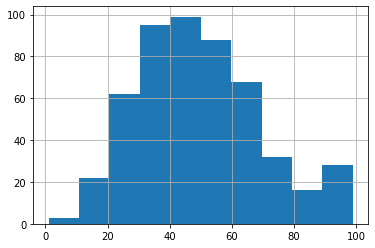

In [69]:
pub_school.SAFETY_SCORE.hist();

## Q6) What is the location in every community area that a crime happened in it? 